 3) MAE=0.428 RMSE=0.570 BIAS=-0.001
ARIMA(2, 2, 4) MAE=0.413 RMSE=0.555 BIAS=0.014
ARIMA(2, 3, 0) MAE=0.680 RMSE=0.901 BIAS=0.003
ARIMA(2, 3, 1) MAE=0.485 RMSE=0.629 BIAS=-0.000
ARIMA(2, 3, 2) MAE=0.452 RMSE=0.598 BIAS=-0.020
ARIMA(2, 3, 3) MAE=0.423 RMSE=0.560 BIAS=0.022
ARIMA(2, 4, 0) MAE=0.991 RMSE=1.424 BIAS=-0.006
ARIMA(2, 4, 1) MAE=0.682 RMSE=0.905 BIAS=-0.007
ARIMA(2, 4, 2) MAE=0.495 RMSE=0.637 BIAS=0.004
ARIMA(2, 4, 3) MAE=0.577 RMSE=0.736 BIAS=0.007
ARIMA(2, 4, 4) MAE=0.426 RMSE=0.562 BIAS=-0.012
ARIMA(3, 0, 0) MAE=0.413 RMSE=0.544 BIAS=-0.017
ARIMA(3, 0, 1) MAE=0.415 RMSE=0.548 BIAS=-0.017
ARIMA(3, 0, 3) MAE=0.421 RMSE=0.557 BIAS=-0.017
ARIMA(3, 0, 4) MAE=0.413 RMSE=0.547 BIAS=-0.001
ARIMA(3, 1, 0) MAE=0.422 RMSE=0.560 BIAS=0.013
ARIMA(3, 1, 1) MAE=0.399 RMSE=0.539 BIAS=0.035
ARIMA(3, 1, 2) MAE=0.380 RMSE=0.532 BIAS=0.061
ARIMA(3, 1, 3) MAE=0.406 RMSE=0.547 BIAS=0.033
ARIMA(3, 1, 4) MAE=0.404 RMSE=0.545 BIAS=0.053
ARIMA(3, 2, 0) MAE=0.472 RMSE=0.619 BIAS=-0.002
ARIMA(3, 2, 1

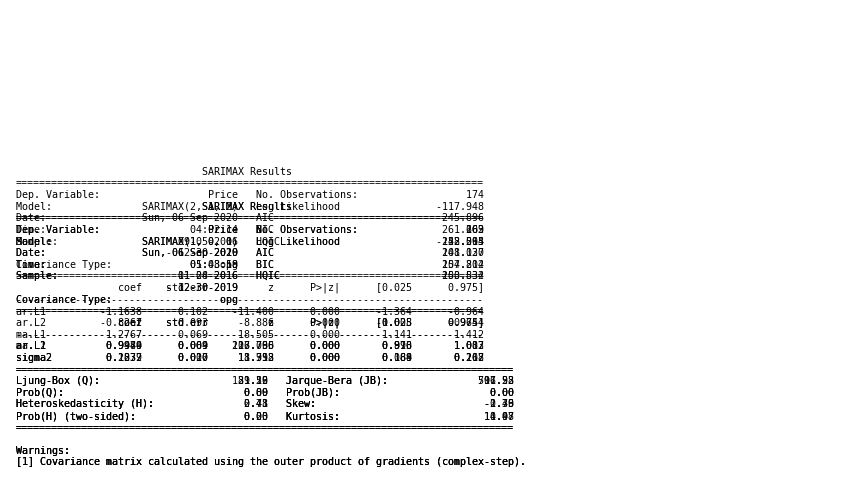

In [1]:
import sys
sys.path.insert(0, '../../src')
#   https://realpython.com/python-modules-packages/
sys.path.append('../../src/d00_utils')
sys.path.append('../../src/d01_data')
sys.path.append('../../src/d02_processing')
sys.path.append('../../src/d03_modelling')
import extractions as extract
import transformations as transf
import training as train
import import_data as imp
import inference as inf
import time  
from dateutil.relativedelta import relativedelta
from datetime import date
import config as conf
    
crop_list = conf.crop_list_arima

for i in range(0, len(crop_list)):

    ####################  Train ARIMA prices  ####################

    # Training

    startp = time.time()

    crop = crop_list[i][0]
    ctry = crop_list[i][1]
    trade_ctry = crop_list[i][2]
    ctgr = crop_list[i][3]
    mdel = crop_list[i][4]
    regn = crop_list[i][5]
    pkge = crop_list[i][6]
    crcy = crop_list[i][7]
    msre = crop_list[i][8]
    exog = crop_list[i][9]

    start = date.today().strftime('%Y-01-01')
    end = (date.today() + relativedelta(years=1)).strftime('%Y-12-31')
    
    train.train_arima_model(crop,ctry,trade_ctry,ctgr,mdel)

    #################### Inference prices ####################

    df_pred = inf.get_prediction(ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel,exog,start,end)
    inf.load_predictions_db(df_pred,ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel)

    endp = time.time()
    duration = endp - startp
    minutes = duration // 60
    seconds = duration - (minutes * 60)
    print(f"{minutes} minutes and {seconds} seconds")